In [3]:
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
import warnings



# Reading dataset

In [4]:

df_data= pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv')
df_label=pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/labels.csv')

In [5]:
df_data.drop(columns=['Unnamed: 0'],inplace=True)
df_label.drop(columns=['Unnamed: 0'],inplace=True)

# Performing PCA on dataset

In [8]:
def PCA(df,threshold):
    ## Performing Standardization so that all features are given same importance initially and each feature can contribute
    ## equally to PC irrespective of scale or magnitude
    df =pd.DataFrame(StandardScaler().fit_transform(df))
    ## Performing Data Centering on standardized dataframe
    centred_df= df-np.mean(df,axis=0)
    ## Calculating Covariance 
    covariance=np.cov(df.T)
    eigen_values, eigen_vectors = LA.eig(covariance)
    ## Sorting the eigen values in descending order, using argsort, we get the indices of eigen values in descending order
    sorted_index=eigen_values.argsort()[::-1]
    df_variance=pd.DataFrame(eigen_values[sorted_index]/sum(eigen_values),columns=['variance'])
    df_variance['cumulative_variance']= df_variance['variance'].cumsum()
    ## Number of principal components required to cover variance uptill certian threshold
    df_number_pc_var=df_variance[df_variance['cumulative_variance']<= threshold]
    number_of_pc=len(df_number_pc_var)
    print("The number of principal components required to cover {} percent variance are {}".format(threshold*100,number_of_pc))
    ## Selecting the required number of eigen vectores for performing dot product
    selected_eigen_vectors=eigen_vectors[:,sorted_index[:number_of_pc]]
    
    #Projecting data over the selected number of principal components
    principal_component=centred_df.dot(selected_eigen_vectors) #Performing dot product
    principal_component.columns=[f'PC{i+1}' for i in range(number_of_pc)]
    ## Creating Scree plots
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    # Plot the first subplot of variance on the left side
    axes[0].plot(range(1,len(df_number_pc_var)+1), df_number_pc_var['variance'],'ro-', linewidth=2)
    axes[0].set_title('Scree Plot for Variance')
    axes[0].set_ylabel('Variance')
    axes[0].set_xlabel('Number of Principal Component')
    axes[0].set_xticks(np.arange(1, len(df_number_pc_var)+1, 1))

    # Plot the second subplot of cumulative variance on the right side
    axes[1].plot(range(1,len(df_number_pc_var)+1), df_number_pc_var['cumulative_variance'],'ro-', linewidth=2)
    axes[1].set_title('Scree Plot for Cumulative Variance')
    axes[1].set_ylabel('Cumulative Variance')
    axes[1].set_xlabel('Number of Principal Component')
    axes[1].set_xticks(np.arange(1, len(df_number_pc_var)+1, 1))
    plt.show()
    print('Correlation of PC1,PC2 \n',principal_component[['PC1','PC2']].corr())
    plt.scatter(principal_component['PC1'],principal_component['PC2'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Scatter plot of PC1 VS PC2')
    plt.show()
    print('The Total variance explained by PC1,PC2 is {} percent'.format(round(np.real(df_number_pc_var['cumulative_variance'][1])*100,2)))
    
    loadings = pd.DataFrame(selected_eigen_vectors,index=df.columns)
    warnings.filterwarnings("ignore")
    
    return principal_component,loadings,df_variance,df_number_pc_var,eigen_values, eigen_vectors

The number of principal components required to cover 99.0 percent variance are 724


/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


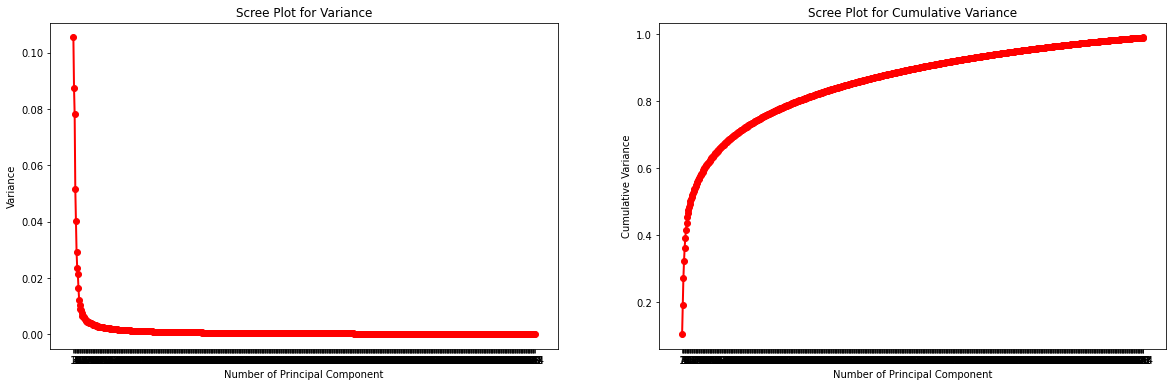

Correlation of PC1,PC2 
               PC1           PC2
PC1  1.000000e+00 -3.620830e-15
PC2 -3.620830e-15  1.000000e+00


/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/pandas/core/internals/managers.py:1587: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = arr.astype(dtype, copy=False)
/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


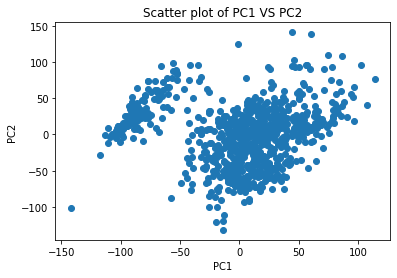

The Total variance explained by PC1,PC2 is 19.29 percent


In [9]:
principal_component,loadings,df_variance,df_number_pc_var,eigen_values, eigen_vectors=PCA(df_data,0.99)


In [11]:
principal_component

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC715,PC716,PC717,PC718,PC719,PC720,PC721,PC722,PC723,PC724
0,57.446987+0.000000j,95.410981+0.000000j,-74.301543+0.000000j,-12.166781+0.000000j,-7.981831+0.000000j,-36.157573+0.000000j,-7.668542+0.000000j,-19.951444+0.000000j,0.142216+0.000000j,-3.035240+0.000000j,...,-0.232667+0.000000j,1.586671+0.000000j,0.644850+0.000000j,0.799427+0.000000j,-1.406288+0.000000j,1.998860+0.000000j,0.660124+0.000000j,0.969045+0.000000j,0.090202+0.000000j,0.431963+0.000000j
1,16.919430+0.000000j,0.732470+0.000000j,64.072900+0.000000j,-2.095308+0.000000j,25.426430+0.000000j,-27.784178+0.000000j,-16.132765+0.000000j,17.031383+0.000000j,-22.023874+0.000000j,27.923308+0.000000j,...,-1.418375+0.000000j,-0.361489+0.000000j,1.429253+0.000000j,-0.276218+0.000000j,-0.572436+0.000000j,0.035497+0.000000j,1.397403+0.000000j,0.468523+0.000000j,1.431122+0.000000j,0.407389+0.000000j
2,70.345218+0.000000j,-19.303327+0.000000j,-20.488240+0.000000j,48.102893+0.000000j,-24.437757+0.000000j,-17.462510+0.000000j,20.706772+0.000000j,47.626817+0.000000j,-28.647648+0.000000j,12.784676+0.000000j,...,0.471654+0.000000j,0.080304+0.000000j,-0.340342+0.000000j,-0.465835+0.000000j,0.136123+0.000000j,0.295109+0.000000j,0.001116+0.000000j,0.313129+0.000000j,0.011685+0.000000j,0.292342+0.000000j
3,49.161591+0.000000j,-9.227586+0.000000j,-61.243770+0.000000j,37.805744+0.000000j,-1.038889+0.000000j,-23.240002+0.000000j,-4.801039+0.000000j,21.554809+0.000000j,-15.375067+0.000000j,12.881511+0.000000j,...,-1.941073+0.000000j,0.019962+0.000000j,0.991209+0.000000j,-1.077849+0.000000j,-0.266235+0.000000j,-0.123645+0.000000j,-0.383379+0.000000j,1.094987+0.000000j,1.176353+0.000000j,1.573271+0.000000j
4,18.132534+0.000000j,-51.327797+0.000000j,-16.598116+0.000000j,-17.699201+0.000000j,-26.389130+0.000000j,1.551573+0.000000j,-6.266101+0.000000j,-12.336677+0.000000j,-4.233837+0.000000j,-28.804476+0.000000j,...,-3.147076+0.000000j,2.781520+0.000000j,-2.106358+0.000000j,-1.198817+0.000000j,-1.353789+0.000000j,-3.024584+0.000000j,-1.255947+0.000000j,1.654801+0.000000j,0.833258+0.000000j,-0.614064+0.000000j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,12.417385+0.000000j,-42.321573+0.000000j,-28.109566+0.000000j,-31.200320+0.000000j,-38.814556+0.000000j,-2.762444+0.000000j,-15.524261+0.000000j,-10.618692+0.000000j,8.528240+0.000000j,-27.573714+0.000000j,...,0.178854+0.000000j,1.131220+0.000000j,-3.719035+0.000000j,-3.036048+0.000000j,3.029281+0.000000j,-0.784294+0.000000j,-2.182427+0.000000j,-0.426650+0.000000j,2.031755+0.000000j,4.944717+0.000000j
797,29.415554+0.000000j,28.526281+0.000000j,15.956631+0.000000j,-11.635178+0.000000j,37.071404+0.000000j,16.239422+0.000000j,-17.341039+0.000000j,35.107458+0.000000j,-26.870257+0.000000j,-31.147205+0.000000j,...,0.436802+0.000000j,1.019911+0.000000j,0.308150+0.000000j,-0.053001+0.000000j,-0.402051+0.000000j,0.203241+0.000000j,0.852621+0.000000j,-0.199516+0.000000j,0.219027+0.000000j,0.603547+0.000000j
798,4.133090+0.000000j,15.690014+0.000000j,22.644453+0.000000j,-11.982424+0.000000j,57.835783+0.000000j,39.652668+0.000000j,47.718063+0.000000j,-24.221214+0.000000j,22.709097+0.000000j,32.888886+0.000000j,...,0.126735+0.000000j,0.205035+0.000000j,0.266247+0.000000j,0.327283+0.000000j,-0.378598+0.000000j,0.647776+0.000000j,0.013431+0.000000j,0.150297+0.000000j,0.229079+0.000000j,0.211346+0.000000j
799,30.814757+0.000000j,33.526423+0.000000j,-70.565636+0.000000j,16.643656+0.000000j,16.579983+0.000000j,4.318571+0.000000j,20.482607+0.000000j,9.552721+0.000000j,3.680009+0.000000j,7.948784+0.000000j,...,0.038574+0.000000j,-0.183975+0.000000j,-0.507623+0.000000j,-0.286801+0.000000j,-0.080147+0.000000j,1.075990+0.000000j,-0.712412+0.000000j,0.679717+0.000000j,-0.630633+0.000000j,-0.122857+0.000000j


# Performing hierarchical clustering


The silhouette index, Calinski-Harabasz index, and within sum of squares (WSS) are all appropriate techniques for evaluating the quality of clustering results. These indices are classified as internal ,relative and external indices.The silhouette index measures how well each data point fits into its assigned cluster compared to other clusters, the Calinski-Harabasz index measures the ratio of the between-cluster variance to the within-cluster variance, and the WSS measures the sum of squared distances between each data point and the centroid of its assigned cluster. These indices can be used together to get a comprehensive evaluation of clustering results.

In [12]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np

import swifter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
import warnings
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster



def hierarchical_clustering(data,method,k):
    # Standardize the data to ensure all features have the same scale
    data_scaled = StandardScaler().fit_transform(data)

    # Perform hierarchical clustering with full linkage
    Z = linkage(data_scaled, method=method)

    distance_threshold = Z[-k, 2]
    clusters = fcluster(Z, distance_threshold, criterion='distance')

    # Print the number of clusters and their sizes
    n_clusters = len(np.unique(clusters))
    cluster_sizes = [np.sum(clusters == i) for i in range(1, n_clusters+1)]
    print('Number of clusters:{}'.format(n_clusters))
    print('Cluster sizes: {}'.format(cluster_sizes))
    return clusters,data_scaled



def new_centroids(df_label, df1):
    df1['Label']=df_label
    # Calculate the mean of the rows with the same label
    return df1.groupby('Label').mean() # Transpose the dataframe to have the new centroids as columns and index as feature name


def sum_of_square_error(new_centroids, data, labels):
    """
    Computes the sum of squared errors between the data points and their assigned centroids.

    Args:
    new_centroids (DataFrame): The new centroids computed in the current iteration.
    data (DataFrame): The input data points.
    labels : The labels assigned to each data point.

    Returns:
    The sum of squared errors.
    """
    # Transpose the new centroids dataframe and reset the index
    new_centroids = new_centroids.reset_index()
    # Get the columns of the data dataframe
    columns = data.columns
    # Join the data dataframe and the labels clusters
    data['Label'] = labels
    sse = []
    # Compute the distance between each data point and its assigned centroid
    for i in range(1,len(new_centroids)):
        distance = np.sum(np.square(data[data['Label']==i][columns] - new_centroids.iloc[i][columns]), axis=1)
        sse.append(sum(distance))
    # Return the sum of squared errors
    return sum(sse)   

#Calculating silhouette coefficient
def silhouette_coef(df_data,clusters):
    silhouette_avg = silhouette_score(df_data, clusters)
    return silhouette_avg

# Calculating Calinski-Harabasz index
def Calinski_index(df_data,clusters):
    ch_score = calinski_harabasz_score(df_data, clusters)
    return ch_score

def clustering_runs(df_data,method,k):
    # Call clustering to return the clusters assigned after performing the clustering based on method
    clusters,data_scaled=hierarchical_clustering(df_data,method,k)
    # Scaling the data ti calculate the within sum of square error,  silhouette_coef, Calinski_index
    df_scaled= pd.DataFrame(data_scaled)
    df_scaled.columns= df_data.columns
    df_new_centroids = new_centroids(clusters, df_scaled)
    sse=sum_of_square_error(df_new_centroids, df_scaled, clusters)
    silhouette=silhouette_coef(df_scaled,clusters)
    Calinski=Calinski_index(df_scaled,clusters)
    return sse,silhouette,Calinski



# Hierarchical clustering after PCA

In [17]:
method_list=['single','average','complete','ward']
principal_component_r= pd.DataFrame(np.real(principal_component.values), columns=principal_component.columns)
clustering_error=[]
for i in method_list:
    sse,silhouette,Calinski=clustering_runs(principal_component_r,i,5)
    clustering_error.append([i,sse,silhouette,Calinski])
clustering_error_df_afterpca= pd.DataFrame(clustering_error,columns=[ 'method','within_sse','silhouette','Calinski'])  
print(clustering_error_df_afterpca)
    

Number of clusters:5
Cluster sizes: [797, 1, 1, 1, 1]
Number of clusters:5
Cluster sizes: [797, 1, 1, 1, 1]
Number of clusters:5
Cluster sizes: [1, 1, 18, 780, 1]
Number of clusters:5
Cluster sizes: [4, 742, 53, 1, 1]
     method    within_sse  silhouette  Calinski
0    single  1.218457e+06    0.025045  1.109509
1   average  1.220749e+06    0.026407  1.114715
2  complete  1.205918e+06    0.025404  1.115076
3      ward  6.351403e+05    0.023782  1.127397


# Hierarchical clustering before PCA, on raw data

In [18]:
method_list=['single','average','complete','ward']
clustering_error=[]
df_data= pd.read_csv('TCGA-PANCAN-HiSeq-801x20531/data.csv')
df_data.drop(columns=['Unnamed: 0'],inplace=True)
for i in method_list:
    sse,silhouette,Calinski=clustering_runs(df_data,i,5)
    clustering_error.append([i,sse,silhouette,Calinski])
clustering_error_df_beforepca= pd.DataFrame(clustering_error,columns=[ 'method','within_sse','silhouette','Calinski'])  
print(clustering_error_df_beforepca)
    

Number of clusters:5
Cluster sizes: [797, 1, 1, 1, 1]
Number of clusters:5
Cluster sizes: [797, 1, 1, 1, 1]
Number of clusters:5
Cluster sizes: [8, 725, 46, 21, 1]
Number of clusters:5
Cluster sizes: [145, 149, 242, 77, 188]
     method    within_sse  silhouette   Calinski
0    single  5.085878e+07    0.201683   3.080061
1   average  6.262664e+07    0.254268   3.267413
2  complete  2.380982e+07    0.091326  12.106451
3      ward  1.750734e+07    0.133033  63.807552


# Performing Kmeans clustering

In [27]:
import pandas as pd
import swifter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
import warnings
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score

import time
def initialize_centroids(df, k):
    """
    Function to initialize random centroids from dataset.
    Input: 
        - df: pandas dataframe with the data
        - k: integer number of clusters
    Output: 
        - temp_df: pandas dataframe with the centroids as columns and index as label
    """
    centroids = []
    for i in range(k):
        centroids.append(df.apply(lambda x: float(x.sample()))) # Take a random sample from each column to create a centroid
    centroids = pd.concat(centroids, axis=1)
    centroids.index.name = 'Label'

    return centroids


def assign_labels(df, centroids):
    """
    Function to calculate the closest centroid label for each row in a dataframe.
    Input: 
        - df: pandas dataframe with the data
        - centroids: pandas dataframe with the centroids as columns and index as label
    Output: 
        - distances.idxmin(axis=1): pandas series with the label of the closest centroid for each row in df
    """
    distances = centroids.swifter.apply(lambda x: np.sqrt(((df - x) ** 2).sum(axis=1))) # Calculate the Euclidean distance between each row in df and each centroid
    return distances.idxmin(axis=1) # Get the index of the minimum distance, which corresponds to the label of the closest centroid


def new_centroids(df_label, df1):
    """
    Function to calculate the new centroids based on the current labels of the rows.
    Input: 
        - df_label: pandas series with the label of the closest centroid for each row in df1
        - df1: pandas dataframe with the data
    Output: 
        - new_centroids.T: pandas dataframe with the new centroids as columns and index as feature name
    """
    joined_df = df1.join(df_label)
    joined_df.rename(columns={0: 'Label'}, inplace=True) # Rename the column with the label
    # Calculate the mean of the rows with the same label
    return joined_df.groupby('Label').mean().T # Transpose the dataframe to have the new centroids as columns and index as feature name


def sum_of_square_error(new_centroids, data, labels):
    """
    Computes the sum of squared errors between the data points and their assigned centroids.

    Args:
    new_centroids (DataFrame): The new centroids computed in the current iteration.
    data (DataFrame): The input data points.
    labels (DataFrame): The labels assigned to each data point.

    Returns:
    The sum of squared errors.
    """
    # Transpose the new centroids dataframe and reset the index
    new_centroids = new_centroids.T.reset_index()
    # Get the columns of the data dataframe
    columns = data.columns
    # Join the data dataframe and the labels dataframe
    data = data.join(labels)
    # Rename the '0' column of the labels dataframe to 'Label'
    data.rename(columns={0:'Label'}, inplace=True)
    sse = []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):
        distance = np.sum(np.square(data[data['Label']==i][columns] - new_centroids.iloc[i][columns]), axis=1)
        sse.append(sum(distance))
    # Return the sum of squared errors
    return sum(sse)   


#Calculating silhouette coefficient
def silhouette_coef(df_data,clusters):
    silhouette_avg = silhouette_score(df_data, clusters)
    return silhouette_avg

# Calculating Calinski-Harabasz index
def Calinski_index(df_data,clusters):
    calinski_i = calinski_harabasz_score(df_data, clusters)
    return calinski_i


def kmeans_lyod_with_error(df1, k, tou):
    """
    Function to run the K-means Lloyd algorithm.
    Input: 
        - df1: pandas dataframe with the data
        - k: integer number of clusters
        - tou: float tolerance level to stop the algorithm
    Output: 
        - centroids: pandas dataframe with the final centroids as columns and index as label
    """
    start_time=time.time()
    centroids = initialize_centroids(df1, k) # Initialize random centroids
    initial_list_of_columns = centroids.columns.to_list()
    iteration = 0
    while True:
        # Assign labels to current centroids
        df_label = assign_labels(df1, centroids)
        df_label = pd.DataFrame(df_label)
        # Calculate new centroids
        df_new_centroids = new_centroids(df_label, df1)
        new_list_of_columns = df_new_centroids.columns.to_list()
        # Keep the number of clusters the same i.e maintain same k
        for i in initial_list_of_columns:
            if i not in new_list_of_columns:
                df_new_centroids[i] = centroids[i]
        # Calculate tao
        distance = []
        for col in centroids.columns:
            col_distance = euclidean(centroids[col], df_new_centroids[col])
            distance.append(col_distance)
        tao_calculated=sum(distance)/k #Used the formula provided for calculating Tao

        sse = sum_of_square_error(df_new_centroids, df1, df_label)
        silhouette=silhouette_coef(df_data,df_label[0].tolist())
        calinski= Calinski_index(df_data,df_label[0].tolist())
        #error=error_clusters(df_label,df1,k)
        end_time= time.time()
        if iteration>100:  
            print("Iteration exceeded")

            return  sse,end_time-start_time,silhouette,calinski
            break
            
        if tao_calculated<tou or iteration >100:   #if the convergence is met, kmeans will stop  or else if the convergence is never met, after 100 iteration code will stop 
            return  sse,end_time-start_time,silhouette,calinski
            break                                   # otherwise indefinite loop
        else:
            centroids= df_new_centroids # In case we need more iterations, the centroids calculated at this step acts as input
        iteration+=1



# Kmeans Clustering before PCA, on raw data

In [28]:
error_matrix=[]
for i in range (1,21):
    sse,run_time,silhouette,calinski=kmeans_lyod_with_error(df_data,5,10)
    error_matrix.append([i,sse,run_time,silhouette,calinski])
error_matrix_df_kmeans_before_pca= pd.DataFrame(error_matrix,columns=[ 'repetition','sse','run_time','silhouette','calinski'])  
error_matrix_df_kmeans_before_pca


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

,repetition,sse,run_time,silhouette,calinski
0,1,2.135823e+07,123.955080,0.110063,70.973062
1,2,5.232844e+07,105.081858,0.201279,129.499701
2,3,1.961593e+07,67.955089,0.146858,94.952224
3,4,1.883595e+07,67.664535,0.191388,107.124583
4,5,1.781075e+07,123.442670,0.224683,124.745340
5,6,1.934011e+07,93.834916,0.176683,99.144437
6,7,2.093683e+07,92.358829,0.158225,76.406937
7,8,1.936076e+07,129.317696,0.196911,98.826412
8,9,2.003128e+07,89.616689,0.137397,88.857193
9,10,2.052819e+07,71.425088,0.120323,81.889251


# K means Clustering after PCA

In [29]:
error_matrix=[]
principal_component_r= pd.DataFrame(np.real(principal_component.values), columns=principal_component.columns)
for i in range (1,21):
    sse,run_time,silhouette,calinski=kmeans_lyod_with_error(principal_component_r,5,10)
    error_matrix.append([i,sse,run_time,silhouette,calinski])
error_matrix_df_kmeans_after_pca= pd.DataFrame(error_matrix,columns=[ 'repetition','sse','run_time','silhouette','calinski'])  
error_matrix_df_kmeans_after_pca

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

,repetition,sse,run_time,silhouette,calinski
0,1,1.215650e+07,8.755339,0.195804,110.691437
1,2,1.283826e+07,5.019011,0.102453,83.385177
2,3,1.299850e+07,4.112319,0.156921,78.505156
3,4,1.206367e+07,7.457407,0.198386,113.200583
4,5,1.274882e+07,5.853305,0.119285,85.457448
5,6,1.229531e+07,6.513062,0.182727,97.958988
6,7,1.244166e+07,6.285403,0.172728,93.789398
7,8,1.302005e+07,6.820693,0.134633,76.389511
8,9,1.359605e+07,3.945988,0.047835,49.865022
9,10,1.204229e+07,6.474845,0.203262,116.083067


In [32]:
combined_df_kmeans = pd.concat([error_matrix_df_kmeans_after_pca, error_matrix_df_kmeans_before_pca], keys=['after_pca', 'before_pca'])


# Plots for kmeans before and after PCA

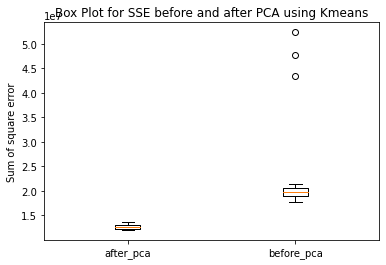

In [34]:
plt.boxplot([combined_df_kmeans.loc['after_pca']['sse'], combined_df_kmeans.loc['before_pca']['sse']])
plt.xticks([1, 2], ['after_pca', 'before_pca'])
plt.ylabel('Sum of square error')
plt.title('Box Plot for SSE before and after PCA using Kmeans')
plt.show()

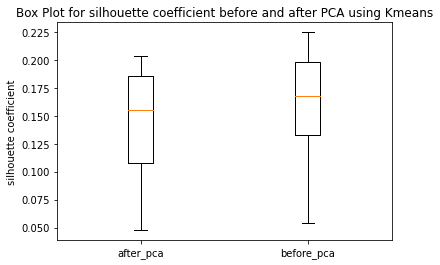

In [36]:
plt.boxplot([combined_df_kmeans.loc['after_pca']['silhouette'], combined_df_kmeans.loc['before_pca']['silhouette']])
plt.xticks([1, 2], ['after_pca', 'before_pca'])
plt.ylabel('silhouette coefficient')
plt.title('Box Plot for silhouette coefficient before and after PCA using Kmeans')
plt.show()

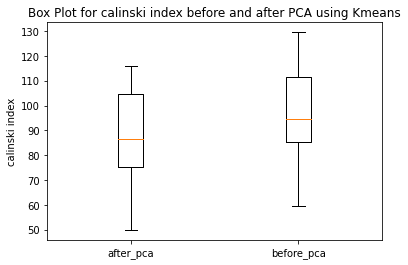

In [37]:
plt.boxplot([combined_df_kmeans.loc['after_pca']['calinski'], combined_df_kmeans.loc['before_pca']['calinski']])
plt.xticks([1, 2], ['after_pca', 'before_pca'])
plt.ylabel('calinski index')
plt.title('Box Plot for calinski index before and after PCA using Kmeans')
plt.show()

# Plots for Hierarchical clustering before and after PCA

In [ ]:
merged_df_cluster = pd.merge(clustering_error_df_beforepca, clustering_error_df_afterpca, on='method', suffixes=('_before_pca', '_after_pca'))


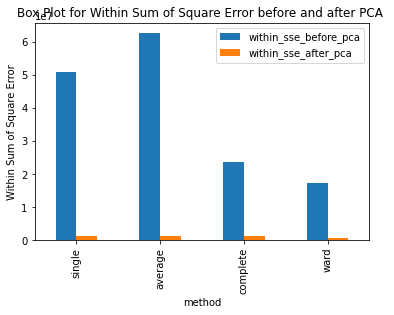

In [47]:
merged_df_cluster[['method','within_sse_before_pca','within_sse_after_pca']].plot(x='method', kind='bar')
plt.ylabel('Within Sum of Square Error')
plt.title('Box Plot for Within Sum of Square Error before and after PCA ')
plt.show()

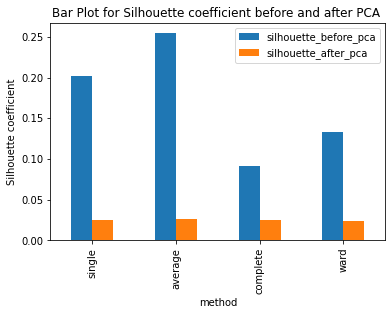

In [49]:
merged_df_cluster[['method','silhouette_before_pca','silhouette_after_pca']].plot(x='method', kind='bar')
plt.ylabel('Silhouette coefficient')
plt.title('Bar Plot for Silhouette coefficient before and after PCA ')
plt.show()

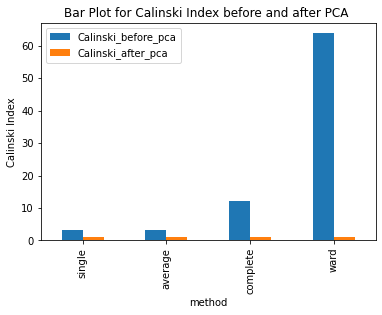

In [50]:
merged_df_cluster[['method','Calinski_before_pca','Calinski_after_pca']].plot(x='method', kind='bar')
plt.ylabel('Calinski Index')
plt.title('Bar Plot for Calinski Index before and after PCA ')
plt.show()

In [48]:
merged_df_cluster

,method,within_sse_before_pca,silhouette_before_pca,Calinski_before_pca,within_sse_after_pca,silhouette_after_pca,Calinski_after_pca
0,single,5.085878e+07,0.201683,3.080061,1.218457e+06,0.025045,1.109509
1,average,6.262664e+07,0.254268,3.267413,1.220749e+06,0.026407,1.114715
2,complete,2.380982e+07,0.091326,12.106451,1.205918e+06,0.025404,1.115076
3,ward,1.750734e+07,0.133033,63.807552,6.351403e+05,0.023782,1.127397


In [79]:

after=pd.DataFrame(error_matrix_df_kmeans_after_pca.mean()).T
before=pd.DataFrame(error_matrix_df_kmeans_before_pca.mean()).T
after.drop(columns=['repetition'],inplace=True)
before.drop(columns=['repetition'],inplace=True)
after['method']='kmeans'
before['method']='kmeans'
merge = pd.merge(after, before,on='method', suffixes=('_before_pca', '_after_pca'))
merge.drop(columns=['run_time_before_pca','run_time_after_pca'],inplace=True)
merge.columns=[ 'within_sse_after_pca', 'silhouette_after_pca',
       'Calinski_after_pca', 'method','within_sse_before_pca', 'silhouette_before_pca',
       'Calinski_before_pca']
df_concat = pd.concat([merged_df_cluster, merge])

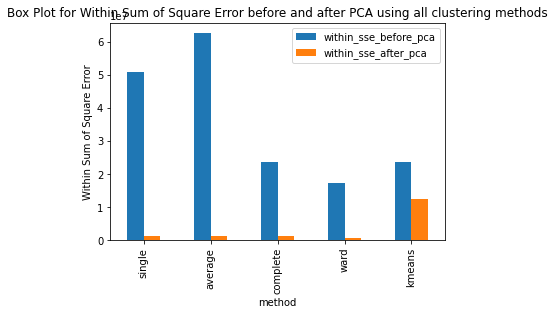

In [83]:
df_concat[['method','within_sse_before_pca','within_sse_after_pca']].plot(x='method', kind='bar')
plt.ylabel('Within Sum of Square Error')
plt.title('Box Plot for Within Sum of Square Error before and after PCA using all clustering methods')
plt.show()

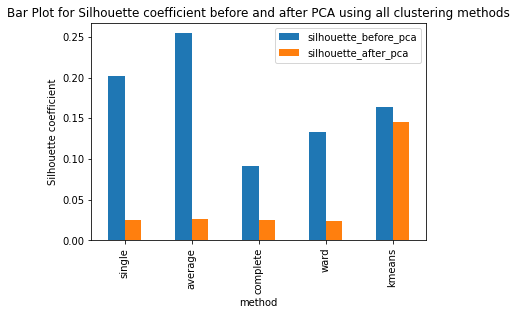

In [84]:
df_concat[['method','silhouette_before_pca','silhouette_after_pca']].plot(x='method', kind='bar')
plt.ylabel('Silhouette coefficient')
plt.title('Bar Plot for Silhouette coefficient before and after PCA using all clustering methods')
plt.show()

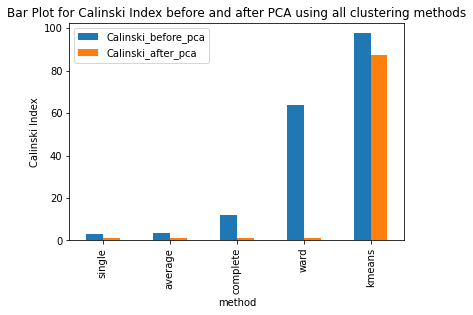

In [85]:
df_concat[['method','Calinski_before_pca','Calinski_after_pca']].plot(x='method', kind='bar')
plt.ylabel('Calinski Index')
plt.title('Bar Plot for Calinski Index before and after PCA using all clustering methods')
plt.show()